## 6.5 Unsupervised Machine Learning

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = path = 'C:/Users/jeanclaude/ACHIEVEMENT 6'

In [5]:
df = pd.read_csv(os.path.join(path, '02 data', 'Prepared Data', 'goals_per_minute_fixed.csv'))
df2 = pd.read_csv(os.path.join(path, '02 data', 'Prepared Data', 'football_results.csv'))

In [6]:
df.shape

(90, 2)

In [7]:
df.head()

,Minute,Count
0,1,193
1,2,333
2,3,319
3,4,341
4,5,382


### 2. The elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\jeanclaude\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jeanclaude\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jeanclaude\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jeanclaude\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

[-3517785.4000000004,
 -1821573.2808988765,
 -635000.1527777778,
 -338774.225931677,
 -198770.69681018224,
 -128311.64506327006,
 -96687.52466752467,
 -70375.90491718425,
 -54122.13377192983]

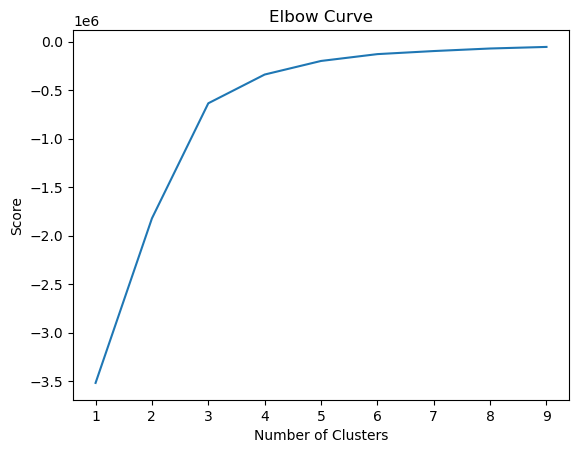

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [12]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\jeanclaude\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jeanclaude\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [13]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\jeanclaude\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jeanclaude\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
df.head()

,Minute,Count,clusters
0,1,193,2
1,2,333,0
2,3,319,0
3,4,341,0
4,5,382,0


In [15]:
df['clusters'].value_counts()

0    81
2     8
1     1
Name: clusters, dtype: int64

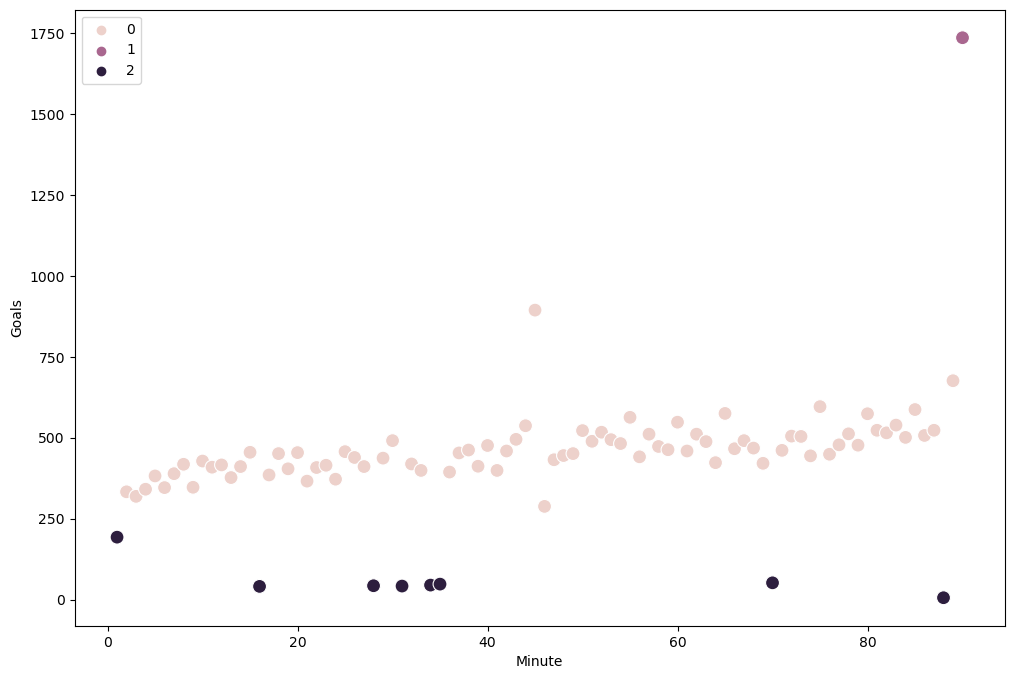

In [16]:
# Plot the clusters for the "Minute" and "Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Minute'], y=df['Count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Minute') # Label x-axis.
plt.ylabel('Goals') # Label y-axis.
plt.show()

In [17]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [18]:
df.groupby('clusters').agg({
    'Minute':['mean','median'],
    'Count':['mean','median']
})

Minute              Count        
               mean median        mean  median
clusters                                      
0         45.703704   47.0   462.37037   457.0
1         90.000000   90.0  1735.00000  1735.0
2         37.875000   32.5    58.75000    44.0

This shows that most goals are scored around the 90th minute of matches , whilst the least amount of goals are scored between 20 and 40 minutes